In [22]:
import sys
import os

lib_path = os.path.realpath(os.path.join(os.getcwd(), ".."))
if lib_path not in sys.path:
    sys.path = [lib_path] + sys.path
save_fig = True
savefig_path = os.path.join(lib_path, "figures/convergence_ESP/")

In [2]:
from src.main_discontinu import *
from src.plot_fields import *
from src.time_problem import *

%matplotlib widget
rc("figure", figsize=(10, 5))
rc("figure", dpi=100)

# Paramètres de la simulation

Ici on va réaliser une simulation sans diffusion pour différentes écritures de notre équation thermique.

La résolution se fait à chaque fois en QUICK avec Euler explicite en temps.

La référence utilisée est une simulation TOF sur maillage fin.

In [3]:
n_lim = 10**9
t_fin_lim = 0.02

In [25]:
from copy import copy

Vtot = 0.02 * 0.005**2

phy_prop = PhysicalProperties(
    Delta=0.02,
    v=0.2,
    dS=0.005**2,
    lda1=5.5 * 10**-2,
    lda2=15.5,
    rho_cp1=70278.0,
    rho_cp2=702780.0,
    diff=1.0,
    alpha=0.06,
    a_i=357.0,
)

phy_prop_sans_conv = copy(phy_prop)
phy_prop_sans_conv.v = 0.0

nums_prop = [
    NumericalProperties(
        dx=dx,
        dt=9.086292531027587e-07,
        schema="quick",
        time_scheme="rk3",
        phy_prop=phy_prop,
        cfl=0.5,
        fo=0.5,
        interp_type="Ti",
        conv_interf="quick",
        time_integral = "exact",
    )
    for dx in [
        2.0 * 10**-5,
        3.5 * 10**-5,
        5.01 * 10**-5,
        7.0 * 10**-5,
        9.0 * 10**-5,
    ]
]

num_prop_ref = NumericalProperties(
    dx=0.7 * 10**-5, schema="weno", time_scheme="rk3", phy_prop=phy_prop, cfl=1.0
)
markerss = [
    BulleTemperature(phy_prop=phy_prop, x=num_prop.x, n_bulle=1)
    for num_prop in nums_prop
]
# for markers in markerss:
# markers.shift(0.0001)

AttributeError: 'NumericalProperties' object has no attribute 'dt'

In [5]:
init_params_ref = {
    "markers": markerss[-1],
    "phy_prop": phy_prop_sans_conv,
    "num_prop": num_prop_ref,
}
init_params = {"phy_prop": phy_prop}

# Convergence de l'opérateur ProblemDiscontinuE

On cherche a vérifier que ProblemDiscontinuE tend bien vers la solution TOF sans convection.

## Simulation comparée

In [6]:
probs_E = []
probs_TOF = []
for i in range(len(nums_prop)):
    probs_E.append(
        TimeProblem(
            get_T_creneau,
            problem_state=StateProblemDiscontinuE,
            phy_prop=phy_prop,
            num_prop=nums_prop[i],
            markers=markerss[i],
        )
    )
    probs_TOF.append(
        TimeProblem(
            get_T_creneau,
            problem_state=StateProblem,
            phy_prop=phy_prop,
            num_prop=nums_prop[i],
            markers=markerss[i],
        )
    )
    
prob_ref = TimeProblem(get_T_creneau, **init_params_ref, problem_state=StateProblem)


Energie
dt fourier
9.086292531027587e-07
Db / dx = 59
Monofluid convection :  quick
Interface interp type :  Ti
Face interp :  quick
Time integration method for surfaces : exact

TOF
===
dt fourier
9.086292531027587e-07
Db / dx = 59
Monofluid convection :  quick

Energie
dt fourier
2.7812848789747498e-06
Db / dx = 34
Monofluid convection :  quick
Interface interp type :  Ti
Face interp :  quick
Time integration method for surfaces : exact

TOF
===
dt fourier
2.7812848789747498e-06
Db / dx = 34
Monofluid convection :  quick

Energie
dt fourier
5.696025170858264e-06
Db / dx = 23
Monofluid convection :  quick
Interface interp type :  Ti
Face interp :  quick
Time integration method for surfaces : exact

TOF
===
dt fourier
5.696025170858264e-06
Db / dx = 23
Monofluid convection :  quick

Energie
dt fourier
1.1164209334882196e-05
Db / dx = 17
Monofluid convection :  quick
Interface interp type :  Ti
Face interp :  quick
Time integration method for surfaces : exact

TOF
===
dt fourier
1.1164

Liste des simus similaires : 
['../References/TOF, rk3, weno, dx = 7.00035e-06, dt = 2.2e-07_t_0.200000.pkl']
Liste des simus similaires : 
['../References/TOF, rk3, weno, dx = 7.00035e-06, dt = 2.2e-07_t_0.200000.pkl']
Loading ======> ../References/TOF, rk3, weno, dx = 7.00035e-06, dt = 2.2e-07_t_0.200000.pkl
remaining time to compute : 0.000000
Liste des simus similaires : 
['../References/statistics_TOF, rk3, weno, dx = 7.00035e-06, dt = 2.2e-07_t_0.200000.pkl']


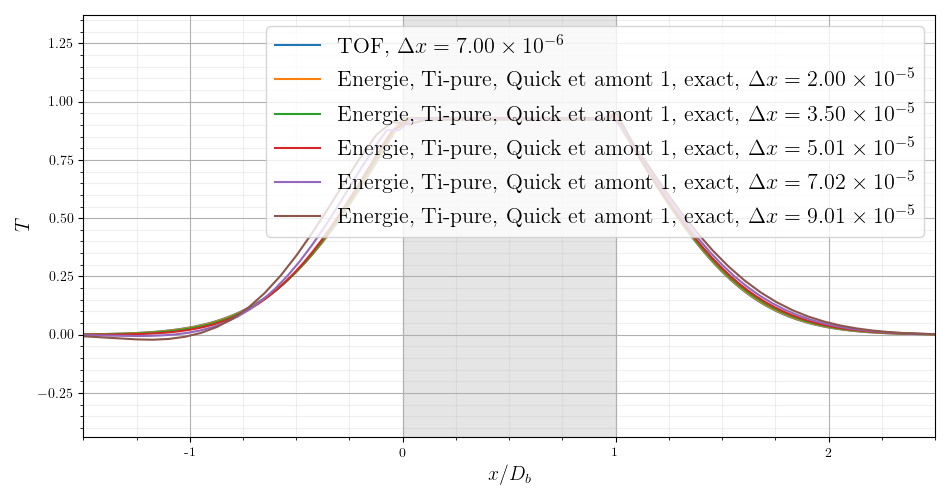

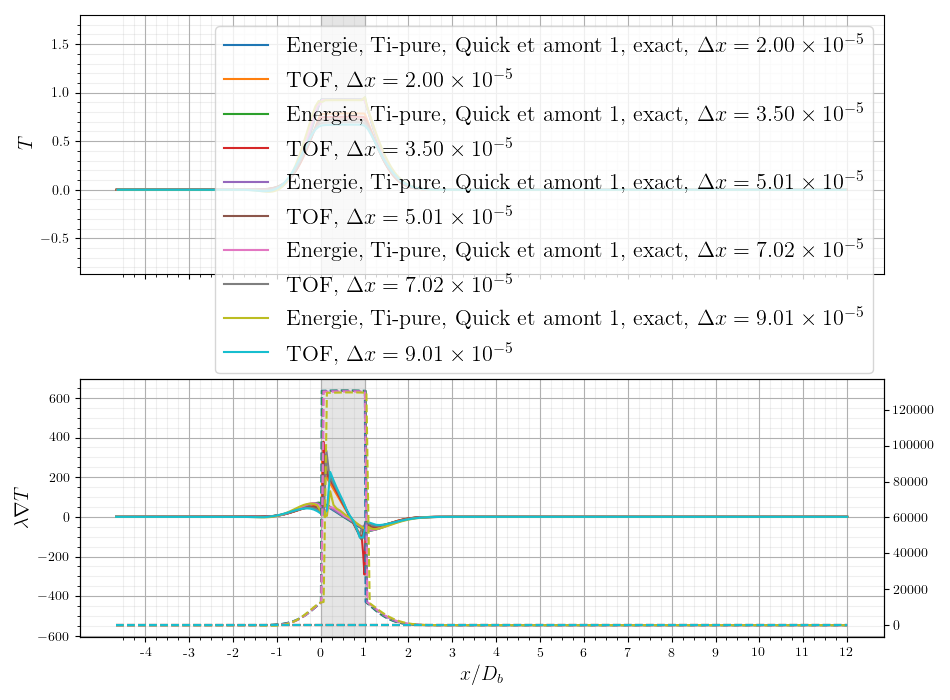

In [7]:
t_fin = 0.02

plot_tot = Plotter(
    "decale", flux_conv=False, lda_gradT=False, zoom=(-1.5, 2.5), dx=True, time=False
)
plot_1 = Plotter("decale", flux_conv=True, lda_gradT=True, dx=True, time=False)

time_args = {"t_fin": min(t_fin, t_fin_lim), "n": n_lim, "number_of_plots": 1}

t_ref, e_ref = prob_ref.load_or_compute(**time_args, plotter=[plot_tot])

for i, prob_E in enumerate(probs_E):
    prob_E.timestep(**time_args, plotter=[plot_1, plot_tot])
    probs_TOF[i].timestep(**time_args, plotter=[plot_1])

'#8c564b'

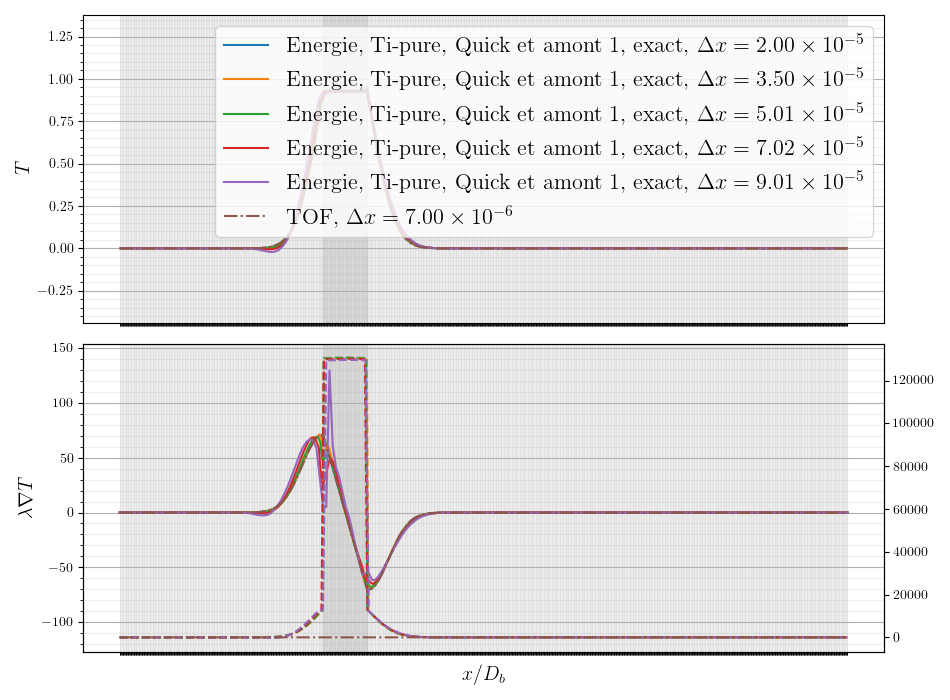

In [8]:
plotter = Plotter(
    "classic", flux_conv=True, lda_gradT=True, dx=True, time=False, ispretty=False
)
# plotter.plot(prob_ref)
for pb in probs_E:
    plotter.plot(pb.problem_state)
plotter.plot(prob_ref.problem_state, plot_Ti=False, ls="-.")

In [9]:
def erreur_L2(y1, y_ref):
    return np.sqrt(np.mean((y1 - y_ref)**2.))

LinregressResult(slope=2.265414029930296, intercept=17.283628004473638, rvalue=0.9973172438041008, pvalue=0.00016673655503452646, stderr=0.0959992321478403)
LinregressResult(slope=0.3643865116274398, intercept=0.7301415982580326, rvalue=0.9993632445884019, pvalue=1.9286407516949617e-05, stderr=0.007511219729985208)


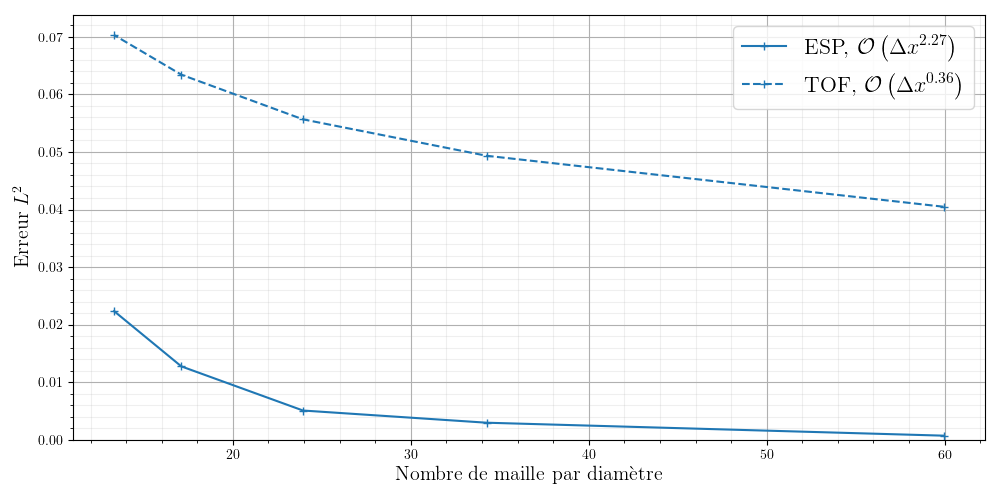

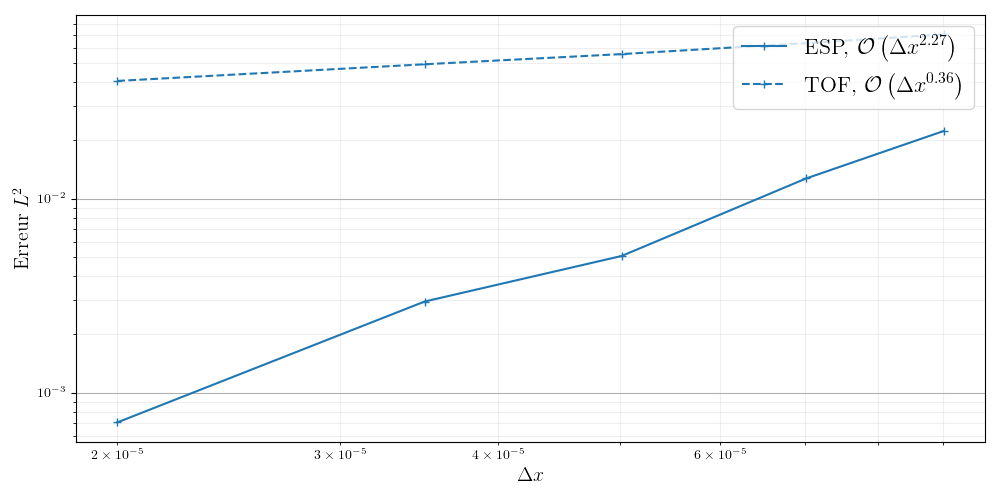

In [23]:
T_ref = prob_ref.problem_state.T
x_ref = prob_ref.problem_state.x
from scipy.interpolate import interp1d
from scipy.stats import linregress
interpolation_ref_func = interp1d(x_ref, T_ref)

nb_maille_par_diametre = []
dxs = []
errors_e = []
errors_tof = []

for i, pb_e in enumerate(probs_E):
    pb_tof = probs_TOF[i]
    T_E = pb_e.problem_state.T
    T_TOF = pb_tof.problem_state.T
    T_interp = interpolation_ref_func(pb_e.problem_state.x)
    nb_maille_par_diametre.append(pb_e.problem_state.bulles.diam / pb_e.problem_state.dx)
    dxs.append(pb_e.problem_state.dx)
    errors_e.append(erreur_L2(T_E, T_interp))
    errors_tof.append(erreur_L2(T_TOF, T_interp))

reg_e = linregress(np.log(dxs), np.log(errors_e))
reg_tof = linregress(np.log(dxs), np.log(errors_tof))
print(reg_e)
print(reg_tof)

fig, ax = plt.subplots()
ax.minorticks_on()
ax.grid(visible=True, which='major')
ax.grid(visible=True, which='minor', alpha=0.2)
l = ax.plot(nb_maille_par_diametre, errors_e, '+-', label=r'ESP, $\mathcal{O}\left({\Delta x}^{%.2f}\right)$' % reg_e.slope)
ax.plot(nb_maille_par_diametre, errors_tof, '+--', c=l[-1].get_color(), label=r'TOF, $\mathcal{O}\left({\Delta x}^{%.2f}\right)$' % reg_tof.slope)
ax.set_xlabel(r'Nombre de maille par diamètre', size='x-large')
ax.set_ylabel(r'Erreur $L^2$', size='x-large')
ax.set_ylim(0.,None)
ax.legend()
fig.tight_layout()
if save_fig:
    fig.savefig(savefig_path + "erreur_L2_lin.pdf")

figlog, axlog = plt.subplots()
axlog.minorticks_on()
axlog.grid(visible=True, which='major')
axlog.grid(visible=True, which='minor', alpha=0.2)
l = axlog.loglog(dxs, errors_e, '+-', label=r'ESP, $\mathcal{O}\left({\Delta x}^{%.2f}\right)$' % reg_e.slope)
axlog.loglog(dxs, errors_tof, '+--', c=l[-1].get_color(), label=r'TOF, $\mathcal{O}\left({\Delta x}^{%.2f}\right)$' % reg_tof.slope)
axlog.set_xlabel(r'$\Delta x$', size='x-large')
axlog.set_ylabel(r'Erreur $L^2$', size='x-large')
axlog.legend()
figlog.tight_layout()
if save_fig:
    figlog.savefig(savefig_path + "erreur_L2_log.pdf")